# TODO: Data colecting & Cleaning


*   (DONE) Download the dataset 'https://www.kaggle.com/datasets/yaswanthgali/sport-celebrity-image-classification'
*   (DONE) Use openCV to cleaning data to getting croped image (Haar Cascade - if have face and 2 eyes)
*   (DONE) Delete wrong croped images







In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P /drive/gaze
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P /drive/gaze

--2025-02-22 05:47:32--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘/drive/gaze/haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  1.99MB/s    in 0.2s    

2025-02-22 05:47:33 (1.99 MB/s) - ‘/drive/gaze/haarcascade_eye.xml’ saved [341406/341406]

--2025-02-22 05:47:33--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected

In [3]:
import cv2

# Load pre-trained Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def get_cropped_image_if_has_2_eyes(image_path):
    cropped_faces = []

    img = cv2.imread(image_path)
    if img is None:
        print("Không thể đọc ảnh.")
        return []

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=6, minSize=(30, 30))

    if len(faces) == 0:
        print("Không phát hiện khuôn mặt.")
        return []
    elif len(faces) == 1:
        print("Nhận diện có 1 khuôn mặt.")
    else:
        print(f"Nhận diện có {len(faces)} khuôn mặt.")

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Eye detection
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) == 0:
            print("Khuôn mặt này không có mắt, bỏ qua.")
            continue  # Bỏ qua khuôn mặt này và kiểm tra khuôn mặt khác

        print("Nhận diện khuôn mặt này có mắt.")
        cropped_faces.append(roi_color)
        plt.imshow(roi_color)
        plt.show()

    return cropped_faces  # Trả về danh sách khuôn mặt đã cắt (có thể rỗng)

In [4]:
import os

def save_cropped_faces_to_drive(image_path, cropped_faces, folder_name, path_to_cleaned):
    """
    Lưu các khuôn mặt đã nhận diện được vào thư mục trong Google Drive.

    Args:
        image_path (str): Đường dẫn ảnh gốc.
        cropped_faces (list): Danh sách ảnh khuôn mặt đã cắt.
        folder_name (str): Tên thư mục nhân vật.
    """
    # Tạo đường dẫn thư mục đích
    save_folder = os.path.join(path_to_cleaned, folder_name)
    os.makedirs(save_folder, exist_ok=True)  # Tạo thư mục nếu chưa tồn tại

    # Lưu từng ảnh khuôn mặt
    base_name = os.path.splitext(os.path.basename(image_path))[0]  # Lấy tên file gốc (không có đuôi .jpg)

    for idx, face in enumerate(cropped_faces):
        save_path = os.path.join(save_folder, f"{base_name}_face_{idx}.jpg")
        cv2.imwrite(save_path, face)  # Lưu ảnh
        print(f"✅ Đã lưu: {save_path}")

In [5]:
import matplotlib.pyplot as plt

folder_names = ['Messi', 'Ronaldo']

path_to_raw = '/content/drive/MyDrive/(SVM)ImageClassification/raw_dataset'
path_to_cleaned = '/content/drive/MyDrive/(SVM)ImageClassification/cleaned_dataset'

raw_dirs = [os.path.join(path_to_raw, name) for name in folder_names]

count_number_of_detected_faces = {name: 0 for name in folder_names}

for images in raw_dirs:
    folder_name = os.path.basename(images)  # Lấy tên thư mục (tên nhân vật)

    for image in os.listdir(images):
        if image.endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(images, image)
            cropped_faces = get_cropped_image_if_has_2_eyes(img_path)

            if cropped_faces:  # Chỉ cập nhật nếu có ảnh hợp lệ
                count_number_of_detected_faces[folder_name] += len(cropped_faces)
                save_cropped_faces_to_drive(img_path, cropped_faces, folder_name, path_to_cleaned)

# In kết quả số lượng khuôn mặt đã phát hiện
print("Số lượng khuôn mặt phát hiện được:")
for name, count in count_number_of_detected_faces.items():
    print(f"{name}: {count} khuôn mặt")

Output hidden; open in https://colab.research.google.com to view.

⏸ ⏸ ⏸ ⏸ ⏸ ⏸ ⏸ ⏸ ⏸ ⏸ ⏸ ⏸ ⏸ ⏸ ⏸ ⏸ ⏸ ⏸

# TODO: Data feature wavelet transform


*   (DONE) Pywt - py waveless transform library
*   (DONE) Feature & labels separating
*   (DONE) Label Encoding

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pip install pywavelets

import cv2
import numpy as np
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    # convert to gray
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    # process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.2 MB/s eta 0:00:00


In [8]:
import os

folder_names = ['Messi', 'Ronaldo']
path_to_cleaned = '/content/drive/MyDrive/(SVM)ImageClassification/cleaned_dataset'
cleaned_dirs = [os.path.join(path_to_cleaned, name) for name in folder_names]
cleaned_dirs

['/content/drive/MyDrive/(SVM)ImageClassification/cleaned_dataset/Messi',
 '/content/drive/MyDrive/(SVM)ImageClassification/cleaned_dataset/Ronaldo']

In [9]:
import matplotlib.pyplot as plt

X = []
y = []

for dir in cleaned_dirs:
    if not os.path.exists(dir):
        print(f"Thư mục không tồn tại: {dir}")
        continue

    label = os.path.basename(dir)  # Nhãn tương ứng với thư mục

    for img_name in os.listdir(dir):
        if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        img_path = os.path.join(dir, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Lỗi khi đọc ảnh: {img_path}")
            continue

        # Resize ảnh gốc
        scaled_img = cv2.resize(img, (32, 32)).astype(np.float32)

        # Wavelet transform
        img_harr = w2d(img, mode='db1', level=5)
        scaled_img_harr = cv2.resize(img_harr, (32, 32)).astype(np.float32)

        # Ghép 2 ảnh lại thành vector đặc trưng
        combined_img = np.concatenate((scaled_img.flatten(), scaled_img_harr.flatten()))


        X.append(combined_img)
        y.append(label)  # Thêm nhãn tương ứng

        # ✅ Hiển thị ảnh gốc và ảnh Wavelet Transform
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))

        # Ảnh gốc
        axes[0].imshow(img)
        axes[0].set_title(f"Original - {label}")

        # Ảnh sau Wavelet Transform (chuyển ảnh grayscale sang dạng map)
        axes[1].imshow(scaled_img_harr, cmap="gray")
        axes[1].set_title("Wavelet Transform")

        plt.show()


# Chuyển danh sách thành numpy array
X = np.array(X)
y = np.array(y)

print(f"Dataset có {X.shape[0]} mẫu, mỗi mẫu có kích thước {X.shape[1]}")

Output hidden; open in https://colab.research.google.com to view.

In [10]:
32*32*3 + 32*32

4096

In [11]:
print(X.shape)

(475, 4096)


In [12]:
print(X)

[[ 54.  47.  54. ...  45.  61.  75.]
 [ 81.  78.  74. ...  26.  28.  52.]
 [ 58. 170. 253. ...  42.  27.   9.]
 ...
 [ 70.  74.  84. ...   3.   0.   0.]
 [ 51.  51.  51. ...  18. 248. 207.]
 [ 29.  33.  34. ... 239.  30.   8.]]


In [13]:
print(type(X))

<class 'numpy.ndarray'>


In [14]:
print(y.shape)

(475,)


In [15]:
print(y)

['Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi'
 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'M

In [16]:
from sklearn.preprocessing import LabelEncoder

# Tạo đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Chuyển đổi nhãn thành số
y_encoded = label_encoder.fit_transform(y)



# Xáo trộn thứ tự ngẫu nhiên
indices = np.random.permutation(len(y_encoded))

# In 10 giá trị ngẫu nhiên
print("10 nhãn gốc ngẫu nhiên:", y[indices[:10]])
print("10 nhãn ngẫu nhiên sau khi mã hóa:", y_encoded[indices[:10]])

10 nhãn gốc ngẫu nhiên: ['Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Messi' 'Ronaldo'
 'Ronaldo' 'Ronaldo']
10 nhãn ngẫu nhiên sau khi mã hóa: [0 0 0 0 0 0 0 1 1 1]


0 => Messi


---


1 => Ronaldo


# TODO: Training model


*   (DONE) Train test split, StandardScaler
*   (DONE) Training with SVM
*   (DONE) Classification Report


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8842105263157894

0 => Messi


---


1 => Ronaldo


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        42
           1       0.88      0.92      0.90        53

    accuracy                           0.88        95
   macro avg       0.89      0.88      0.88        95
weighted avg       0.88      0.88      0.88        95



# TODO: Using GridSearch to try out different models with different hyperparas -> Finding best model with best finetuned

*   (DONE) GridCV for difference hyperparas
*   (DONE) Choose best models
*   (DONE) Evaluation







In [22]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10],
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10],
        }
    },
}

In [25]:
import pandas as pd

scores = []
best_estimators = {}

for alg, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)

    scores.append({
        'model': alg,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
    })

    best_estimators[alg] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,model,best_score,best_params
0,svm,0.915789,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.815789,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.915789,{'logisticregression__C': 5}


In [28]:
best_estimators['svm'].score(X_test, y_test)

0.8736842105263158

In [30]:
best_estimators['random_forest'].score(X_test, y_test)

0.7789473684210526

In [29]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8947368421052632

In [31]:
best_clf = best_estimators['svm']
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [32]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, best_clf.predict(X_test))
conf_matrix

array([[33,  9],
       [ 3, 50]])

Text(50.722222222222214, 0.5, 'Truth')

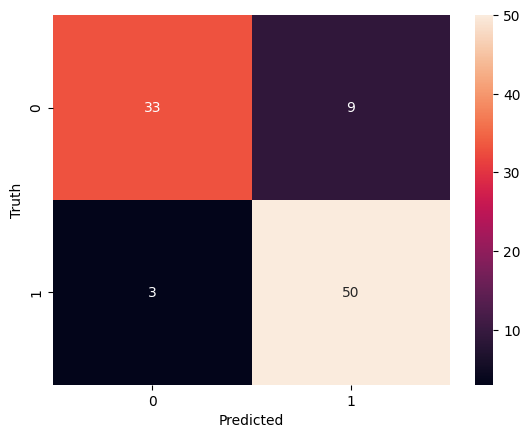

In [35]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
class_dict = {
    'Messi': 0,
    'Ronaldo': 1,
}

# TODO: Data colecting & Cleaning


*   (DONE) Save model (joblib)
*   (DONE) Save class dictionary







In [37]:
!pip install joblib

In [39]:
import joblib
# Save the model as pkl file
joblib.dump(best_clf, '/content/drive/MyDrive/(SVM)ImageClassification/saved_model.pkl')

['/content/drive/MyDrive/(SVM)ImageClassification/saved_model.pkl']

In [41]:
import json
with open('/content/drive/MyDrive/(SVM)ImageClassification/class_dictionary.json', 'w') as f:
  json.dump(class_dict, f)